In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
data.drop(['Email','Address','Avatar'], axis=1 ,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<AxesSubplot: >

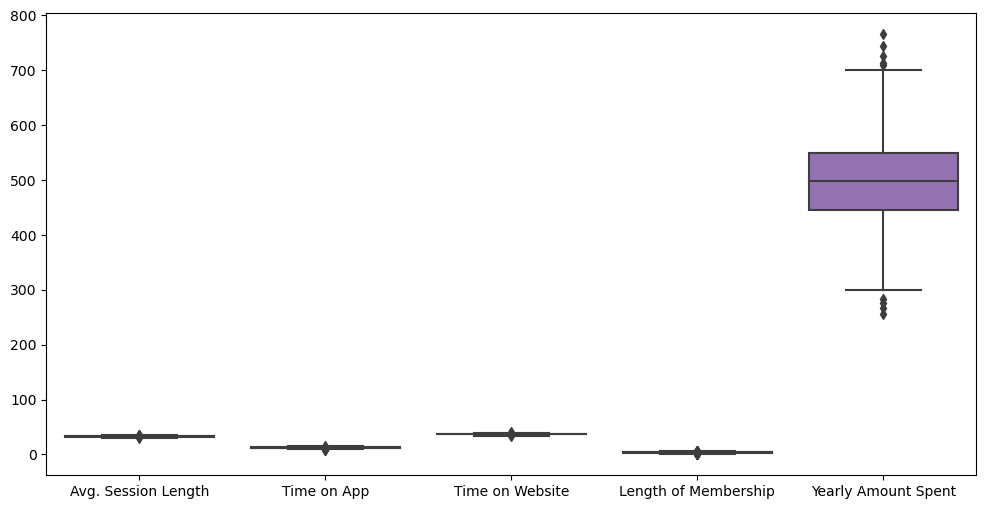

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)

<AxesSubplot: >

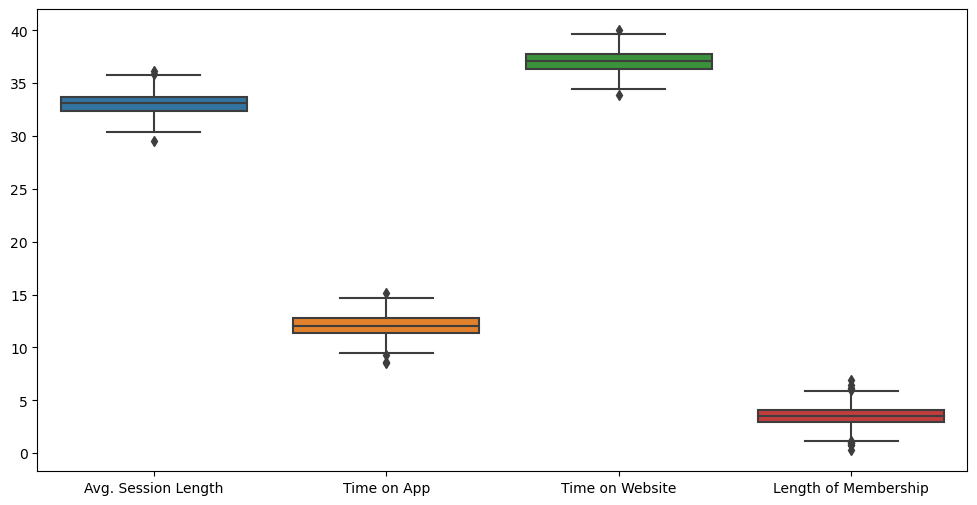

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data.iloc[:,:-1])

<AxesSubplot: >

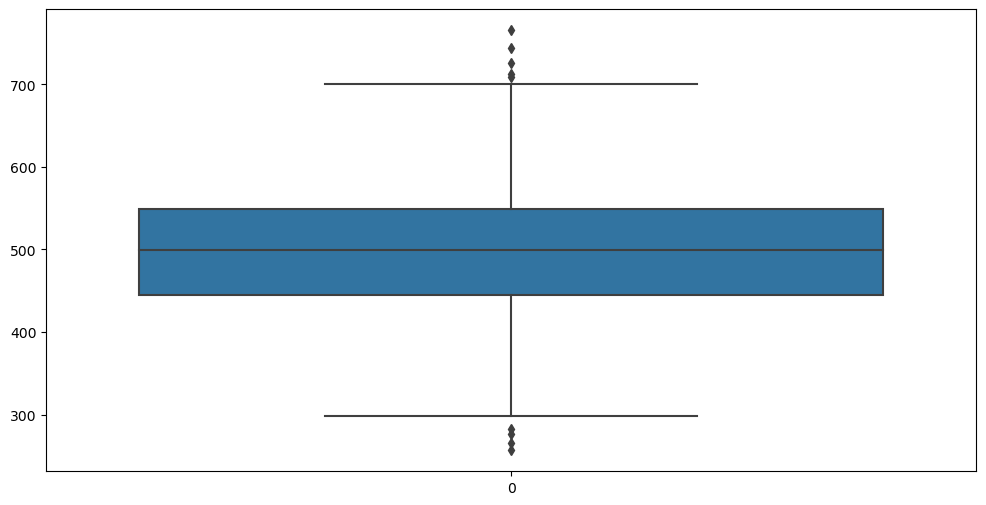

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data['Yearly Amount Spent'])

<Figure size 1200x600 with 0 Axes>

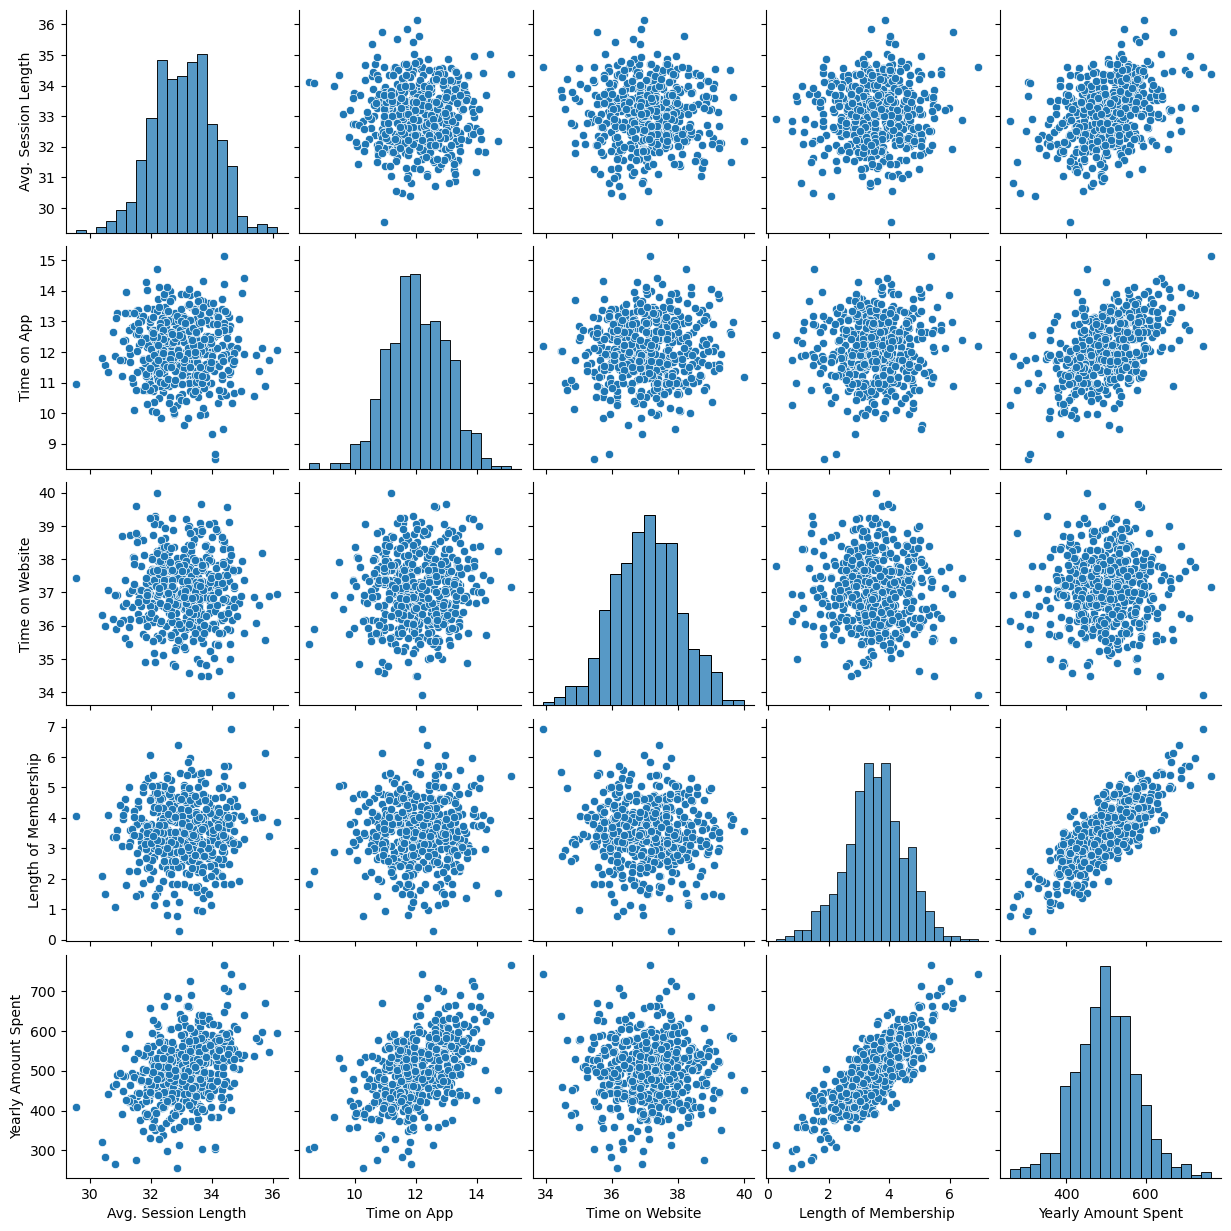

In [7]:
plt.figure(figsize=(12,6))
sns.pairplot(data=data)

In [8]:
data.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

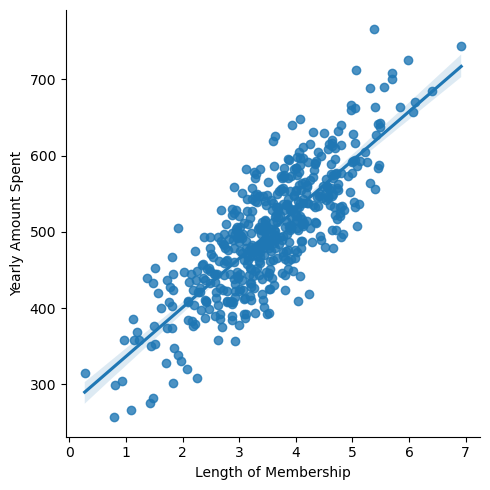

In [9]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

In [11]:
import statsmodels.api as sm

X = data['Length of Membership']
y = data['Yearly Amount Spent']

lm = sm.OLS(y,X).fit()

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Wed, 08 Feb 2023   Prob (F-statistic):                        0.00
Time:                         18:22:01   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

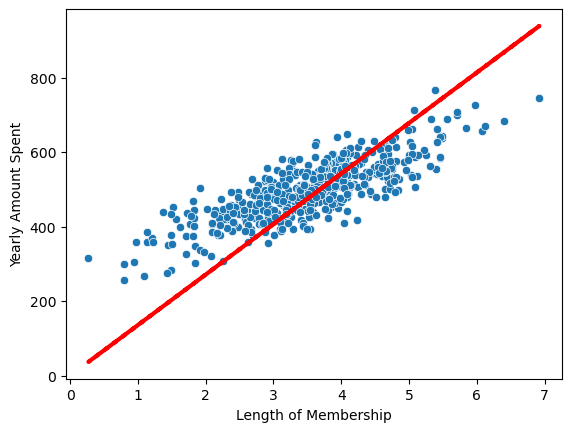

In [13]:
pred = lm.predict(X)

sns.scatterplot(x=X, y=y)
plt.plot(X,pred,'r',ls='dashed',lw=3)

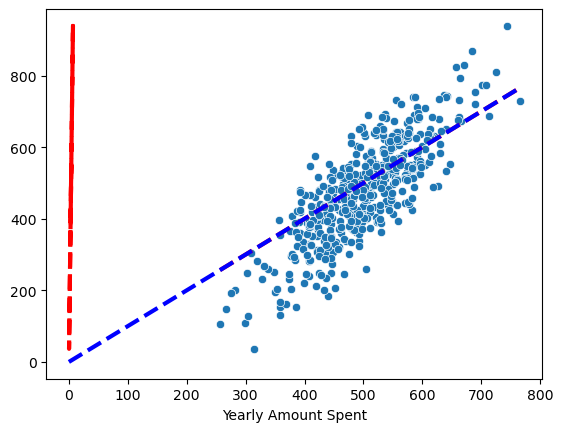

In [15]:
sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)],[min(y), max(y)],'r',ls='dashed',lw=3)
plt.plot([0, max(y)],[0, max(y)],'b',ls='dashed',lw=3)
plt.plot(X,pred,'r',ls='dashed',lw=3)

In [18]:
X = np.c_[X,[1]*len(X)]
X[:5]

array([[4.08262063, 1.        , 1.        , 1.        ],
       [2.66403418, 1.        , 1.        , 1.        ],
       [4.1045432 , 1.        , 1.        , 1.        ],
       [3.12017878, 1.        , 1.        , 1.        ],
       [4.44630832, 1.        , 1.        , 1.        ]])

In [19]:
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Wed, 08 Feb 2023   Prob (F-statistic):          4.81e-117
Time:                         18:31:57   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const         90.7999      2.558     35.492      0.000      85.773      95.826
x2            90.7999      2.558     35.492      0.000      85.773      95.826
x3            90.7999      2.558     35.492      0.000      85.773      95.826
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                     3.07e+32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.66e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [21]:
lm = sm.OLS(y_train,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.997e+04
Date:                 Wed, 08 Feb 2023   Prob (F-statistic):                        0.00
Time:                         18:35:50   Log-Likelihood:                         -1813.3
No. Observations:                  400   AIC:                                      3635.
Df Residuals:                      396   BIC:                                      3650.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.7641      0.829     14.183      0.000      10.133      13.395
Time on App             34.8647      1.103     31.615      0.000      32.697      37.033
Time on Website        -14.1410      0.761    -18.586      0.000     -15.637     -12.645
Length of Membership    60.7673      1.132     53.673      0.000      58.542      62.993
==============================================================================
Omnibus:                        2.567   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                2.304
Skew:                          -0.100   Prob(JB):                        0.316
Kurtosis:                       2.686   Cond. No.                         54.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

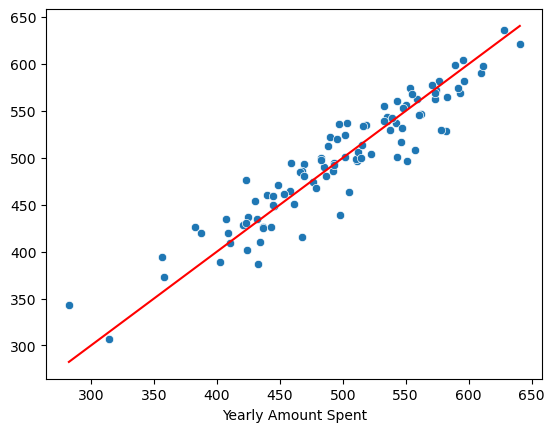

In [23]:
pred = lm.predict(X_test)

sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')